In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Data Exploration
def data_exploration(df, title):
    print(f"\n{title} Dataset Shape:", df.shape)
    print(f"\n{title} First 5 rows:\n", df.head())
    print(f"\n{title} Feature Types:\n", df.dtypes)
    print(f"\n{title} Summary Statistics:\n", df.describe(include='all'))
    print(f"\n{title} Missing Values:\n", df.isnull().sum())

In [6]:
data_exploration(train_data, "Training")
data_exploration(test_data, "Testing")


Training Dataset Shape: (891, 12)

Training First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123       

# Data Visualization

Text(0.5, 1.0, 'Training Data: Survival Count')

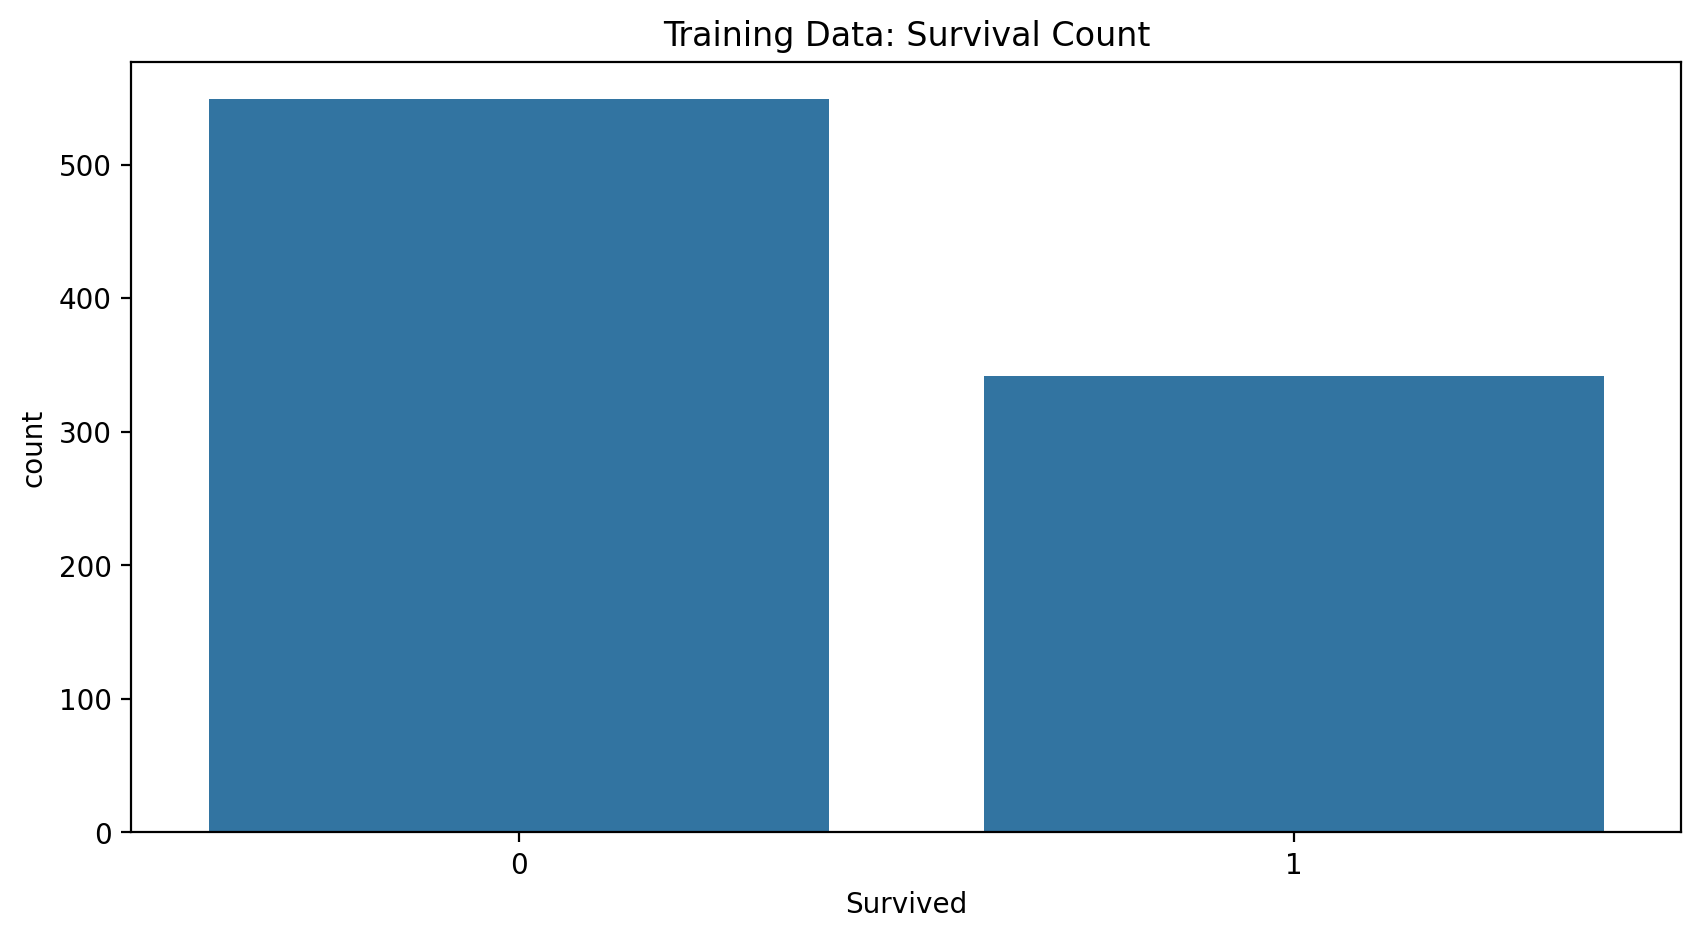

In [8]:
# Visualizations for training data
sns.countplot(x='Survived', data=train_data)
plt.title('Training Data: Survival Count')

- The Training Data Survival Rate is above 300 %.

<Axes: ylabel='Count'>

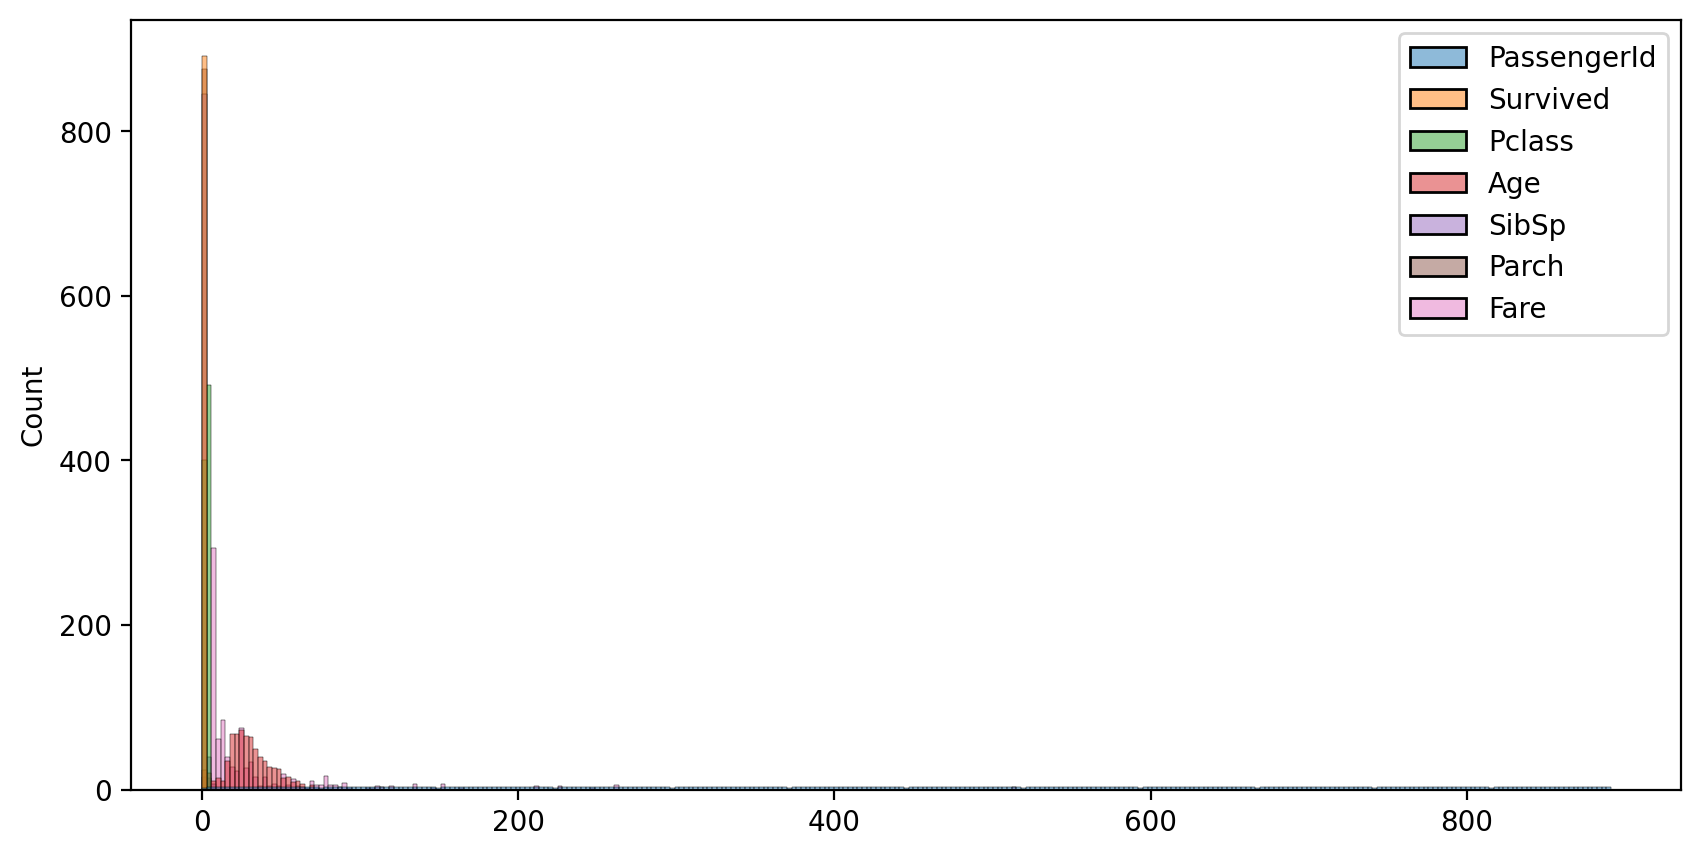

In [10]:
sns.histplot(data=train_data)

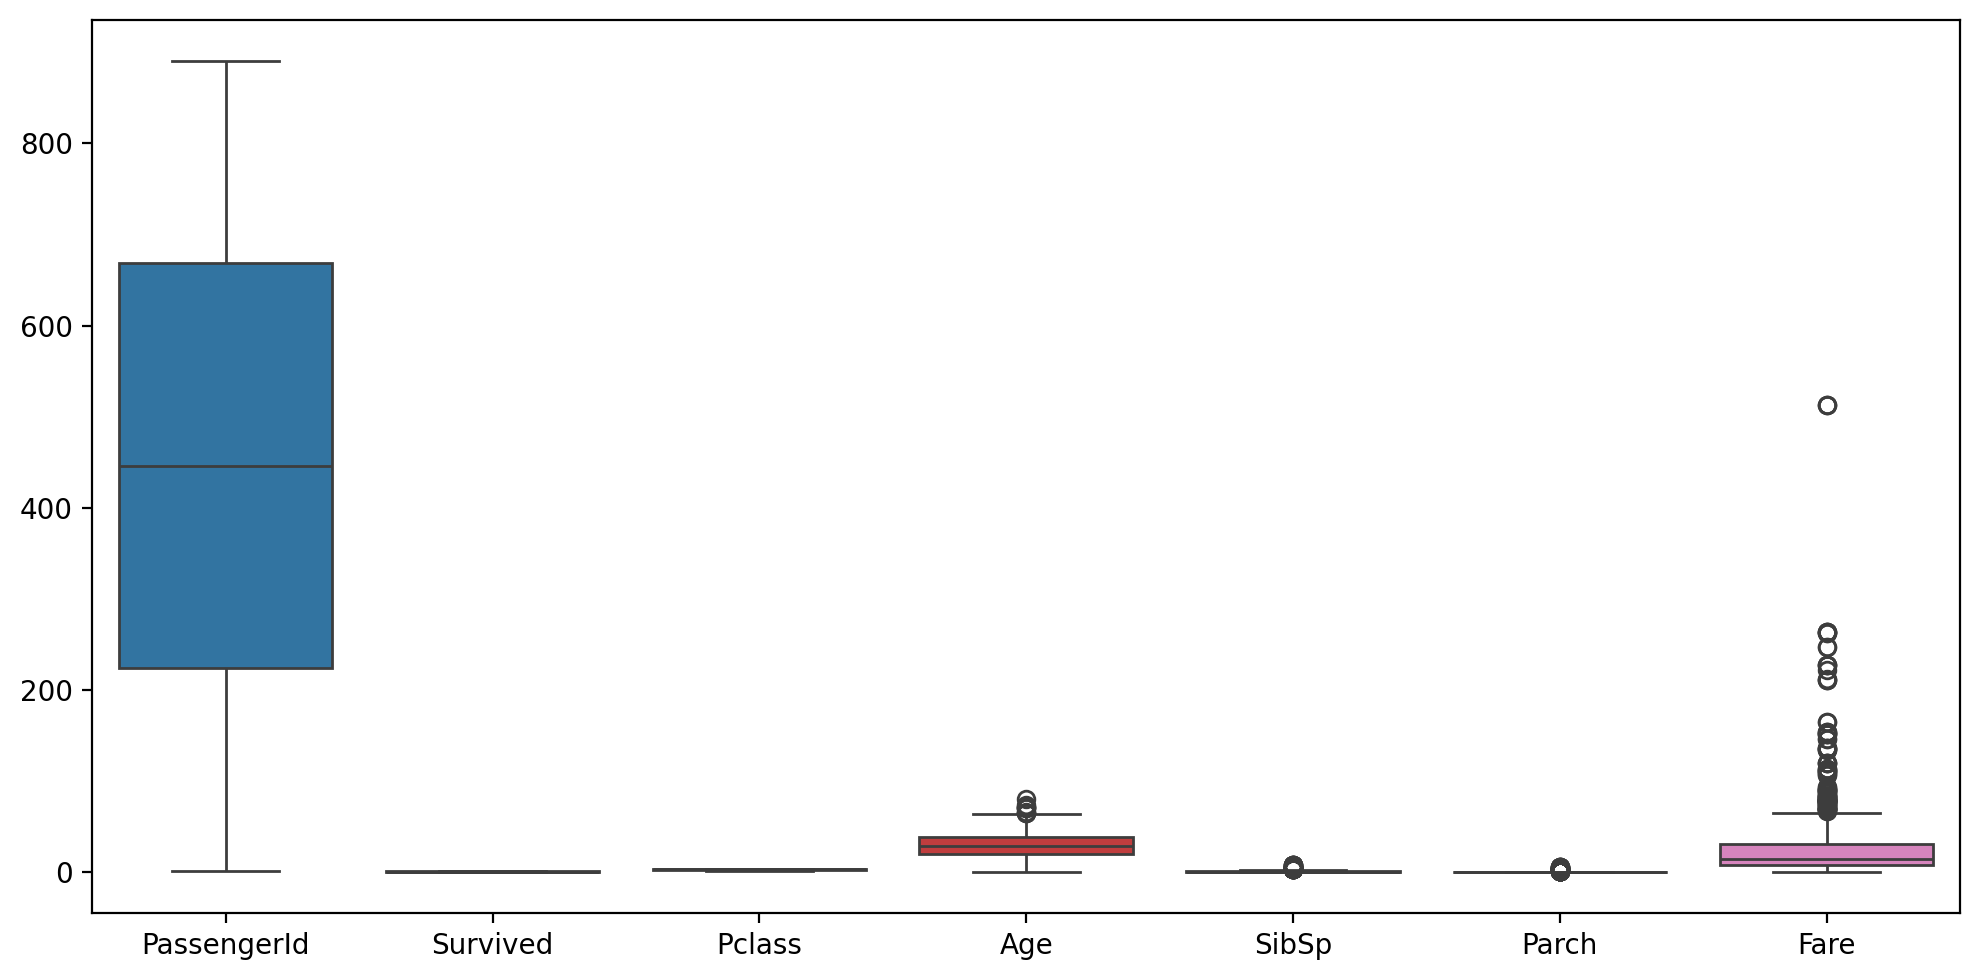

In [11]:
sns.boxplot(data=train_data)
plt.tight_layout()

- The Age, SibSp, Parch & Fare Columns have potential outliers.

# Data Pre-Processing

In [14]:
# Data Preprocessing
def preprocess_data(df, is_train=True):
    df = df.copy()

    # Handling missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    if is_train:
        df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    else:
        df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Dropping unnecessary columns
    df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

    # Encoding categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'].astype(str))

    return df

In [15]:
train_data = preprocess_data(train_data, is_train=True)
test_data = preprocess_data(test_data, is_train=False)

In [16]:
train_data.drop(['PassengerId'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [17]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,27.0,0,0,8.0500,2


In [18]:
# Splitting training data into features and target
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

In [19]:
# Extracting features from test data
X_test = test_data.copy()

In [20]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  2.00893337,
        -0.17626324,  0.58595414],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [22]:
X_test

array([[ 1.73399584,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49078316, -0.67817453],
       [ 1.73788372,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.50747884,  0.58595414],
       [ 1.74177161, -0.36936484,  0.73769513, ..., -0.47367361,
        -0.45336687, -0.67817453],
       ...,
       [ 3.34746731,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [ 3.35135519,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.48633742,  0.58595414],
       [ 3.35524307,  0.82737724,  0.73769513, ...,  0.76762988,
        -0.19824428, -1.9423032 ]])

# Model Building

In [24]:
# Model Building
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
# Predictions on test data
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

In [26]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
y_test_prob

array([0.09765831, 0.37241203, 0.09964386, 0.10433957, 0.58547615,
       0.16065811, 0.6591993 , 0.1949973 , 0.79089106, 0.07413305,
       0.10425003, 0.33066863, 0.9359403 , 0.06084893, 0.84861392,
       0.86906723, 0.23760747, 0.18319331, 0.56056718, 0.57511883,
       0.2957505 , 0.17215112, 0.93952492, 0.65783698, 0.9041509 ,
       0.03455409, 0.96540347, 0.1749288 , 0.37665268, 0.08878608,
       0.09623153, 0.17422256, 0.46247543, 0.52105156, 0.52063   ,
       0.19813705, 0.63726513, 0.68856987, 0.1121671 , 0.11434798,
       0.09431855, 0.50562328, 0.06408207, 0.82142474, 0.85628204,
       0.11190439, 0.44325148, 0.12634144, 0.88178737, 0.51132454,
       0.47229429, 0.34564947, 0.76778672, 0.88513406, 0.34596829,
       0.06850161, 0.07933396, 0.11195609, 0.07961611, 0.96483859,
       0.14611782, 0.22111634, 0.141414  , 0.72509288, 0.65650115,
       0.84009897, 0.75451428, 0.33092051, 0.57564458, 0.7803738 ,
       0.70979082, 0.12822404, 0.62018734, 0.59842545, 0.96251

In [28]:
# Model Evaluation (using cross-validation approach on train data)

from sklearn.model_selection import cross_val_score

In [29]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Accuracy Scores: [0.78212291 0.78651685 0.78089888 0.76404494 0.80898876]
Mean Accuracy: 0.7845


# ROC-AUC Score & Curve(Plot)

- Providing a code for ROC Curve for Training Data.
- Also providing code for ROC-AUC Score for the same.

Training ROC-AUC Score: 0.8566


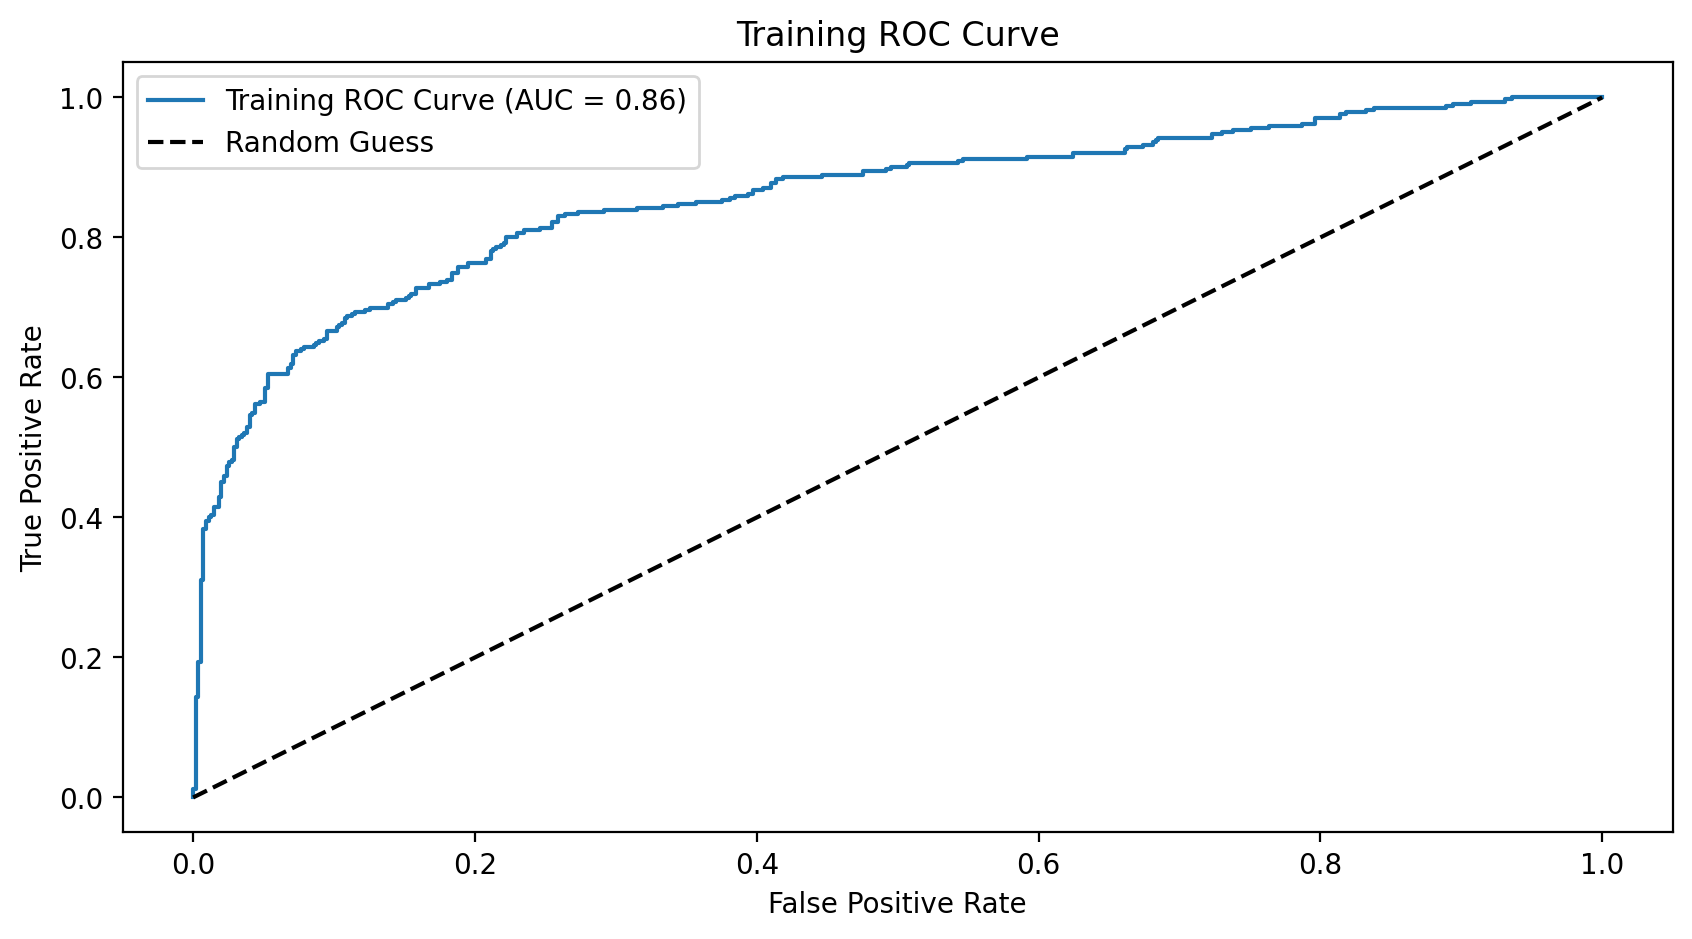

In [31]:
y_train_prob = model.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_train_prob)
print(f"Training ROC-AUC Score: {roc_auc_train:.4f}")

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve')
plt.legend()

In [32]:
# ROC-AUC Curve and Score (for test data)
if 'Survived' in test_data.columns:
    y_test_true = test_data['Survived']
    roc_auc_test = roc_auc_score(y_test_true, y_test_prob)
    print(f"Test ROC-AUC Score: {roc_auc_test:.4f}")

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Test ROC Curve')
    plt.legend()
    plt.show()
else:
    print("True labels for the test dataset are unavailable. Skipping ROC-AUC calculation for test set.")

True labels for the test dataset are unavailable. Skipping ROC-AUC calculation for test set.


- The ROC-AUC Score cannot be calculated because the roc_auc_score function requires both y_true (the true labels) and y_score (the predicted probabilities). In your test dataset, if the true labels (Survived) are not available, roc_auc_score cannot be calculated.

# Interpretation

In [35]:
# Interpretation
coefficients = pd.DataFrame({'Feature': train_data.drop('Survived', axis=1).columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:\n", coefficients)


Feature Importance:
        Feature  Coefficient
6         Fare     0.103369
0  PassengerId     0.023416
5        Parch    -0.077695
7     Embarked    -0.169368
4        SibSp    -0.350641
3          Age    -0.495690
1       Pclass    -0.890633
2          Sex    -1.295436


In [36]:
# Discussion of feature significance
for idx, row in coefficients.iterrows():
    print(f"{row['Feature']}: {'Positive' if row['Coefficient'] > 0 else 'Negative'} influence on survival with coefficient {row['Coefficient']:.4f}")

Fare: Positive influence on survival with coefficient 0.1034
PassengerId: Positive influence on survival with coefficient 0.0234
Parch: Negative influence on survival with coefficient -0.0777
Embarked: Negative influence on survival with coefficient -0.1694
SibSp: Negative influence on survival with coefficient -0.3506
Age: Negative influence on survival with coefficient -0.4957
Pclass: Negative influence on survival with coefficient -0.8906
Sex: Negative influence on survival with coefficient -1.2954


In [37]:
# Saving the predictions for the test data
test_data['Survived'] = y_test_pred
test_data[['PassengerId', 'Fare', 'Age', 'Embarked', 'SibSp', 'Survived']].to_csv('Titanic_predictions.csv', index=False)
print("Predictions saved to Titanic_predictions.csv.")

Predictions saved to Titanic_predictions.csv.


# Interview Questions

1. What is the difference between precision and recall ?

- Precision and recall are both performance metrics used in machine learning to measure how well a model is performing. The main difference between the two is that precision is a measure of quality, while recall is a measure of quantity.
- A model with high precision and high recall is performing well. However, the balance between precision and recall depends on the context of the problem. For example, in healthcare, it's more important to prioritize recall than precision because failing to vaccinate someone who is at risk can have serious consequences. 

2. What is cross-validation, and why is it important in binary classification ?

- Cross-validation is a technique for evaluating a machine learning model and testing its performance. CV is commonly used in applied Machine Learning tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem.
- The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data.

In [40]:
import pickle

In [41]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [42]:
# loading the dataset

loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [43]:
loaded_model

LogisticRegression(random_state=42)